In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
education = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Education_and_Environment_Data.xlsx")

In [4]:
top10depart_RF_1995_2018 = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_RF_1995_2018.csv")  

In [5]:
top10depart_RF_1995_2018 = top10depart_RF_1995_2018.set_index('Unnamed: 0')

In [6]:
top10depart_RF_1995_2018.index.names = [None]

In [7]:
edu = education.copy()

In [8]:
edu = edu.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [9]:
edu.columns = edu.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [10]:
edu_RF = edu.loc[edu["Country_Name"] == "Russian Federation", :]

In [11]:
edu_RF_1995_2018 = edu_RF.drop(edu_RF.loc[:,'1970':'1994'].columns, axis=1)

In [12]:
edu_RF_1995_2018=edu_RF_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [13]:
result = pd.concat([top10depart_RF_1995_2018, edu_RF_1995_2018], axis=0)

In [14]:
result.head(3)

,Country_Name,Series_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Russian Federation,NaN,21329000.0,12260000.0,11182000.0,10635000.0,12631000.0,1.837100e+07,1.803000e+07,2.042800e+07,20572000.0,2.450700e+07,28416000.0,2.910700e+07,34285000.0,36538000.0,3.427600e+07,3.932300e+07,43726000.0,4.781300e+07,5.406900e+07,45889000.0,3.455000e+07,3.165900e+07,3.962900e+07,4.196400e+07,NaN,NaN
855,Russian Federation,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,9.970000e+01,9.970000e+01,9.960000e+01,99.5,9.930000e+01,99.0,9.890000e+01,98.5,98.0,9.770000e+01,9.710000e+01,96.5,9.580000e+01,9.520000e+01,94.5,9.370000e+01,9.280000e+01,9.210000e+01,9.120000e+01,90.099998,NaN
856,Russian Federation,Access to electricity (% of population),100.0,100.0,100.0,100.0,100.0,1.000000e+02,1.000000e+02,1.000000e+02,100.0,1.000000e+02,100.0,1.000000e+02,100.0,100.0,1.000000e+02,1.000000e+02,100.0,1.000000e+02,1.000000e+02,100.0,9.550000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,NaN


In [15]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False) #or transpose

In [16]:
result_melt.head(5)

,Country_Name,Series_Name,variable,value
4,Russian Federation,NaN,1995,21329000.0
855,Russian Federation,Access to clean fuels and technologies for coo...,1995,NaN
856,Russian Federation,Access to electricity (% of population),1995,100.0
857,Russian Federation,"Access to electricity, rural (% of rural popul...",1995,100.0
858,Russian Federation,"Access to electricity, urban (% of urban popul...",1995,100.0


In [17]:
result_transpose = result.T

In [18]:
result_transpose.head(5)

,4,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139
Country_Name,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russia

In [19]:
df=result_transpose.copy()

In [20]:
df.columns = df.columns.astype(str)

In [21]:
df = df.rename(columns={'4': 'dep4'})

In [22]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [23]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [24]:
df.corrwith(df["dep4"],axis=0).sort_values()

1101   -0.936731
1099   -0.930273
897    -0.909508
1102   -0.902173
896    -0.894856
895    -0.894856
960    -0.893778
957    -0.893665
994    -0.891932
993    -0.891870
992    -0.891525
1070   -0.888289
907    -0.884380
1103   -0.875441
869    -0.874755
868    -0.869399
911    -0.863075
1105   -0.858969
1088   -0.857883
865    -0.850703
1048   -0.848221
889    -0.847899
892    -0.842439
948    -0.841384
1057   -0.840215
1066   -0.833283
867    -0.825072
866    -0.815082
956    -0.810695
933    -0.805779
937    -0.805779
931    -0.805779
927    -0.805779
926    -0.805779
938    -0.805779
925    -0.805779
932    -0.805779
939    -0.805779
974    -0.803016
970    -0.794369
913    -0.792014
891    -0.791988
883    -0.790063
870    -0.787774
1010   -0.787688
908    -0.787145
881    -0.786509
952    -0.786335
890    -0.785881
894    -0.784274
1034   -0.778168
949    -0.775973
1060   -0.773966
893    -0.768548
906    -0.765642
1080   -0.757727
871    -0.749525
1020   -0.740662
1100   -0.7293

In [25]:
df_ind = df.reset_index()

In [26]:
df_ind.head(2)

,index,dep4,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139
0,1995,21329000.0,99.699997,100.0,100.0,100.0,93.30283,93.49224,93.12098,2.88641,2.39962,3.35052,2.069067,13.212540,2164000.0,1052105.0,82.518039,16.621075,106330.0,83.404121,53020.0,5.828980,19.959014,19.192496,60.84849,1.681321,72.498571,68578.0,7.784653,0.859305,127500000.0,460.0,57.0,4376640.0,61901840.0,1255.4,6.69717,6.50776,6.87902,487307.0,231932.0,255375.0,2.168958,0.792509,1.878914,1564900.0,10.546869,61.878953,46.341423,725196.921,24.22343,379072.458,11.927080,3.201571,10.658984,31.823158,498000.602,12.332121,2.458080,0.260342,0.869807,8.0,66.4,NaN,90.117111,85.31179,90.872704,NaN,0.1327,60.980579,57.091599,59.26088,97.163063,97.145142,97.154556,60.324951,51.138271,55.96883,99.682266,99.694542,99.688087,59.161331,49.87038,54.755772,89.53363,88.849998,89.209473,NaN,NaN,NaN,0.63761,0.66447,0.64949,5101.553396,9.717401,18.511780,20.419754,41.215982,11.586611,7.728288,67.456049,0.006868,59000000.0,-51.978495,14.019922,70.976818,4290.693467,322.409634,NaN,NaN,16.1142,18.223472,13.725490,39.0,79.71,49.401052,8091092.0,0.474811,92.303226,3.101644,1.308246,-226.061740,2.93979,8.95185,NaN,NaN,10.96867,100.07903,102.76019,101.44836,16788.7,16378380.0,0.78014,49309960.0,4.610563,99.228363,99.694077,99.440971,1.00092,99.771278,99.679077,99.724602,97.2,96.885338,95.155159,89.599426,10.0,34.0,2.974556,-22.282411,639730.0,454060.0,0.603210,1.826985,81.29652,81.16878,81.41817,-44.109659,63570.0,8.305805,5280.0,4.144310,-14.065466,-137087.703125,0.0,0.0,0.0,0.116007,NaN,NaN,NaN,97.466331,95.479057,94.761932,24866.1,56.0,19.873333,95.310758,2.21351,12.044765,84.041537,9.059247,9200994.0,8.451647,28678511.0,19.328296,1.206441,NaN,6.0,92.147217,92.126694,92.136757,3.0,7849000.0,48.82151,366900.0,98.092117,7.0,100.0,99.62864,100.0,NaN,NaN,18.37728,9.51931,11.79247,NaN,20.426623,3.870681,29151.80662,4312.0,1.90501,1.84217,1.87285,16305829.27,0.770164,127025.8958,39509505.0,26.628,-0.006624,0.341293,62.518719,75.529518,76.134941,107.870651,93.30283,0.99368,0.99921,107.521690,93.49224,108.205658,93.12098,0.2965,91.140900,91.69424,0.99966,91.492363,92.09739,91.523132,91.3103,0.41546,43.132702,1.23135,69.750664,53.614021,7.0,12829000.0,50.96446,14528000.0,48.91708,1306099.0,80.465347,1033357.0,1667400.0,37.00822,9033.2,17098240.0,7.611177,9.72,55.750191,4445218.0,-26.392531,2298150.0,7.309659,NaN,NaN,NaN,NaN,NaN,NaN,96.054527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187538.1445,0.009977,1645.534531,108866282.0,73.372,-0.027101,0.865149,9.712284
1,1996,12260000.0,99.699997,100.0,100.0,100.0,92.77496,93.57329,92.01692,2.88641,2.39962,3.35052,2.069067,13.195233,2161110.0,966128.0,76.662223,15.563627,96840.0,82.517018,49700.0,6.053004,19.959014,19.192496,60.84849,1.681321,72.498571,53309

In [27]:
result_transpose[[959,902,1115,946,968,969,950,973,1108,1003,972]].iloc[1] # > 0.90

959          Energy use (kg of oil equivalent per capita)
902      CO2 emissions from gaseous fuel consumption (kt)
1115    Total greenhouse gas emissions (kt of CO2 equi...
946           Electric power consumption (kWh per capita)
968                          Forest area (% of land area)
969                                  Forest area (sq. km)
950     Electricity production from natural gas source...
973     GDP per unit of energy use (PPP $ per kg of oi...
1108    SF6 gas emissions (thousand metric tons of CO2...
1003             Methane emissions (kt of CO2 equivalent)
972     GDP per unit of energy use (constant 2017 PPP ...
Name: Series_Name, dtype: object

In [28]:
result_transpose[[1004,899,1036,1085,991,1104,1035,1038,1096,1002,898,988,990,1139,963]].iloc[1] # 0.90-0.85

1004    Methane emissions in energy sector (thousand m...
899                CO2 emissions (metric tons per capita)
1036    Population in the largest city (% of urban pop...
1085    School enrollment, primary, private (% of tota...
991     Literacy rate, youth (ages 15-24), gender pari...
1104             Secondary education, teachers (% female)
1035                           Population in largest city
1038    Population in urban agglomerations of more tha...
1096        School enrollment, tertiary, female (% gross)
1002               Methane emissions (% change from 1990)
898                                    CO2 emissions (kt)
988     Literacy rate, adult female (% of females ages...
990     Literacy rate, adult total (% of people ages 1...
1139    Water productivity, total (constant 2015 US$ G...
963     Expenditure on tertiary education (% of govern...
Name: Series_Name, dtype: object

In [29]:
melt_to_plot1 = result_melt[result_melt.index.isin([959])]

In [30]:
melt_to_plot2 = result_melt[result_melt.index.isin([902])]

In [31]:
melt_to_plot3 = result_melt[result_melt.index.isin([1115,946,968,950,973,1108,1003,972])]

In [32]:
melt_to_plot4 = result_melt[result_melt.index.isin([899,1036,991,1104,1035,1038,1002,898,988,990,1139])]

In [33]:
melt_to_plot5 = result_melt[result_melt.index.isin([1085,1104,1096,963])]

In [34]:
melt_ind1 = melt_to_plot1.reset_index()

In [35]:
melt_ind2 = melt_to_plot2.reset_index()

In [36]:
melt_ind3 = melt_to_plot3.reset_index()

In [37]:
melt_ind4 = melt_to_plot4.reset_index()

In [38]:
melt_ind5 = melt_to_plot5.reset_index()

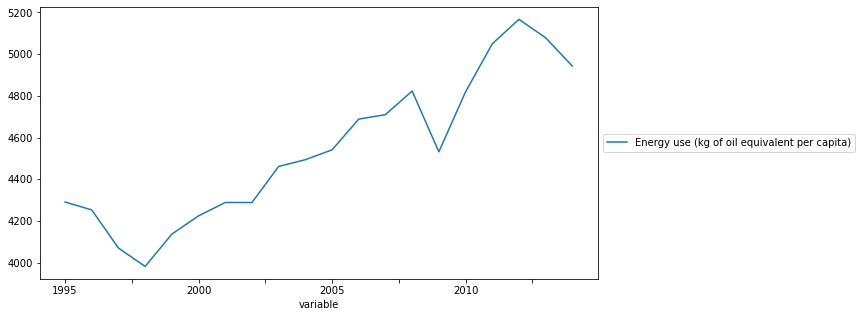

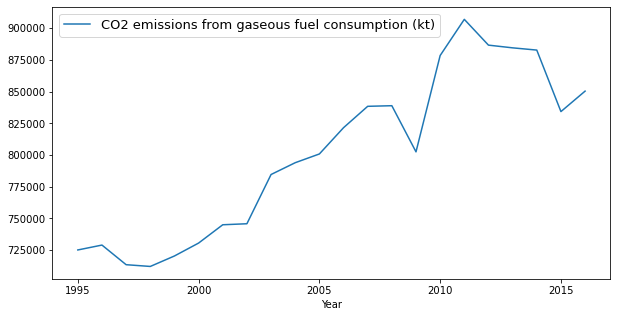

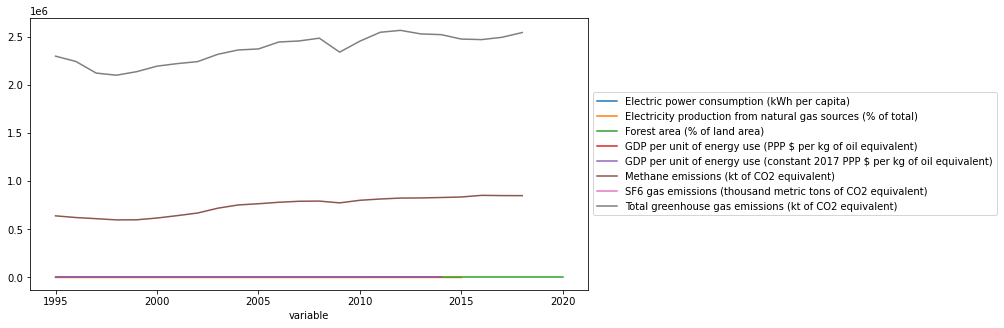

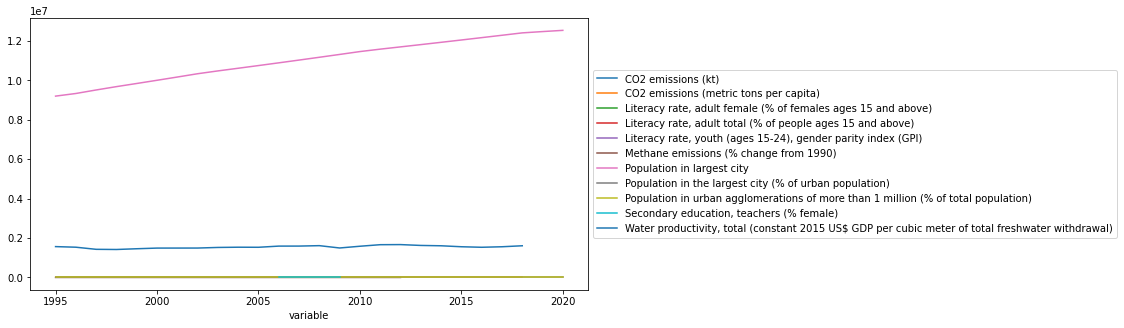

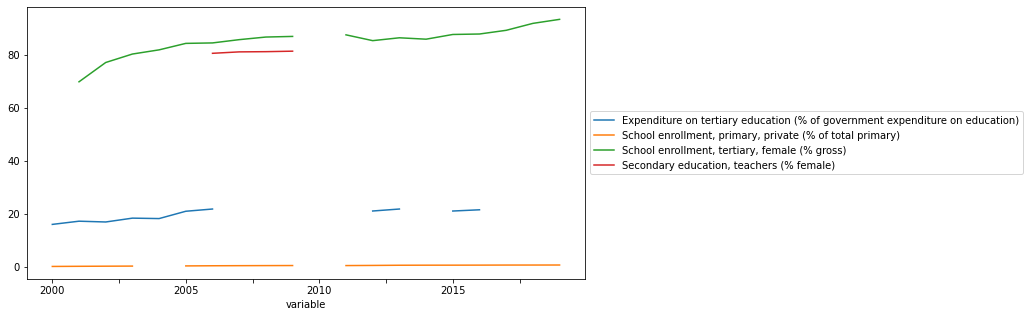

In [40]:
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
e_ch2 = melt_ind2.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/co2emiss_RF.png',dpi=200
           ,bbox_inches='tight')
e_ch3 = melt_ind3.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch3.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
e_ch4 = melt_ind4.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch4.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
e_ch5 = melt_ind5.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch5.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
result_transpose[[1101,1099,897,1102,896,895,960,957,994,993,992,1070,907,1103]].iloc[1]

1101                          Secondary education, pupils
1099                  Secondary education, general pupils
897                   CO2 emissions (kg per PPP $ of GDP)
1102               Secondary education, pupils (% female)
896              CO2 emissions (kg per 2017 PPP $ of GDP)
895                CO2 emissions (kg per 2015 US$ of GDP)
960     Energy use (kg of oil equivalent) per $1,000 G...
957     Energy intensity level of primary energy (MJ/$...
994     Literacy rate, youth total (% of people ages 1...
993     Literacy rate, youth male (% of males ages 15-24)
992     Literacy rate, youth female (% of females ages...
1070                                     Rural population
907     CO2 emissions from residential buildings and c...
1103                        Secondary education, teachers
Name: Series_Name, dtype: object

In [45]:
melt_neg1 = result_melt[result_melt.index.isin([1099])] 

In [47]:
melt_plot1 = melt_neg1.reset_index()

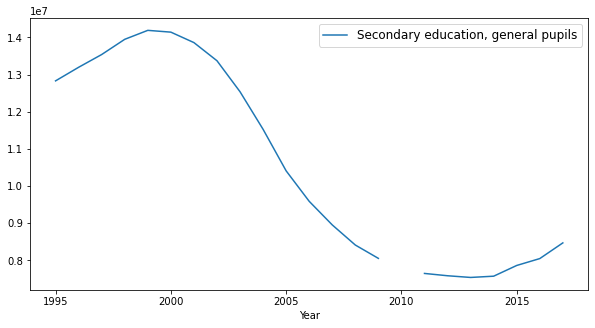

In [48]:
h_neg1 = melt_neg1.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=12)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/edu_neg_RF_1.png',dpi=200
           ,bbox_inches='tight')